In [1]:
# load the vader library for sentiment analysis
import pandas as pd
import numpy as np
import OpenBlender
import json
%matplotlib inline
import matplotlib
from pathlib import Path
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
import nltk
# nltk.download('wordnet')

# import these modules 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
# nltk.sentiment.vader

ps = PorterStemmer() # stemming
wordnet_lemmatizer = WordNetLemmatizer()  #Lemmatization

In [240]:
# get sentiment score applying the vaderSentiment functions

#pull in pricing data for the various coins:
#Litecoin pricing:
file_path = Path("Lite_dataset_news.csv")
Lit_prices_df = pd.read_csv(file_path,index_col="timestamp", infer_datetime_format=True, parse_dates=True)
Lit_prices_df.sort_index(inplace=True)


In [241]:
#USE cardano dataframe for the news
#Cardano pricing:
file_path = Path("final_ADA_with_Crypto_news2.csv")
ADA_prices_df = pd.read_csv(file_path,index_col="timestamp", infer_datetime_format=True, parse_dates=True)
ADA_prices_df.sort_index(inplace=True)


In [263]:
#Bitcoin data:
file_path = Path("final_bitcoin_with_news.csv")
BTC_prices_df = pd.read_csv(file_path,index_col="timestamp", infer_datetime_format=True, parse_dates=True)
BTC_prices_df.sort_index(inplace=True)


In [243]:
Lit_prices_df.index = pd.to_datetime(Lit_prices_df.index, unit='s').date

In [244]:
Lit_prices_df.index

Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
       2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
       ...
       2021-09-13, 2021-09-13, 2021-09-14, 2021-09-14, 2021-09-15, 2021-09-16,
       2021-09-17, 2021-09-17, 2021-09-18, 2021-09-18],
      dtype='object', length=586)

In [245]:
Lit_prices_df['Lite_target'] = Lit_prices_df['target']
Lit_prices_df['Lite_close'] = Lit_prices_df['close']

In [246]:
ADA_prices_df.index = pd.to_datetime(ADA_prices_df.index, unit='s').date

In [247]:
ADA_prices_df.index

Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
       2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
       ...
       2021-09-12, 2021-09-13, 2021-09-13, 2021-09-14, 2021-09-14, 2021-09-15,
       2021-09-16, 2021-09-17, 2021-09-18, 2021-09-18],
      dtype='object', length=556)

In [248]:
list(ADA_prices_df)

['Unnamed: 0',
 'date',
 'price',
 'target',
 'VEC.CRYPTOCURR.text_last1days:crypto',
 'VEC.timestamp',
 'VEC.CRYPTOCURR.text_COUNT_last1days:crypto']

In [249]:
ADA_prices_df['ADA_target'] = ADA_prices_df['target']
ADA_prices_df['ADA_close'] = ADA_prices_df['price']

In [264]:
BTC_prices_df.index = pd.to_datetime(BTC_prices_df.index, unit='s').date

In [265]:
BTC_prices_df.index

Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
       2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
       ...
       2021-09-15, 2021-09-16, 2021-09-17, 2021-09-18, 2021-09-19, 2021-09-20,
       2021-09-21, 2021-09-22, 2021-09-23, 2021-09-24],
      dtype='object', length=586)

In [266]:
BTC_prices_df['BTC_target'] = BTC_prices_df['target']
BTC_prices_df['BTC_close'] = BTC_prices_df['close']


In [267]:
ADA_prices_df = ADA_prices_df.loc[~ADA_prices_df.index.duplicated(keep='first')]
Lit_prices_df = Lit_prices_df.loc[~Lit_prices_df.index.duplicated(keep='first')]
BTC_prices_df = BTC_prices_df.loc[~BTC_prices_df.index.duplicated(keep='first')]

In [268]:
#MERGE THE 3 DATASETS:

combined_ALL_coins_df = pd.concat([BTC_prices_df,ADA_prices_df,Lit_prices_df],join='inner',axis='columns')

In [269]:
combined_ALL_coins_df.tail()
combined_ALL_coins_df.to_csv(r'Combined_ALL_coins_df2.csv')

In [572]:
#list(combined_ALL_coins_df)


In [271]:
combined_ALL_coins_df = combined_ALL_coins_df[['VEC.CRYPTOCURR.text_last1days:bitcoin',
                                               'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
                                               'CRYPTOCURR.text_last1days:positive',
                                               'CRYPTOCURR.text_last1days:negative',
                                              'BTC_target','BTC_close','ADA_target','ADA_close',
                                              'Lite_target','Lite_close']]

In [273]:
combined_ALL_coins_df.to_csv(r'combined_ALL_coins_df_FINAL.csv')

In [277]:
file_path = Path("combined_ALL_coins_df_FINAL.csv")
final_all_coins_df = pd.read_csv(file_path)

In [575]:
final_all_coins_df.head(2)

,Unnamed: 0,FULL_TEXT,VEC.CRYPTOCURR.text_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1,CRYPTOCURR.text_last1days:positive,CRYPTOCURR.text_last1days:negative,BTC_target,BTC_close,ADA_target,...,clean_text1,clean_text2,sentiment1,sentiment2,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2
0,1/1/2020,['what are your 2020 predictions for #crypto?'],[],1,0,[],[],1,7200.85,1,...,'what prediction crypto,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0
1,1/2/2020,[],[],0,0,[],[],0,6965.71,0,...,,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
#REMOVE ANY TWITTER JUNK

In [280]:

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [281]:
print(emoticons)

{':[', 'xp', 'X-P', ':c)', ':*', ':p', ';(', ':-/', ':}', ':-)', '=-3', ':-[', ':\\', '>;)', ':-D', '>:P', ':>', ':b', ':-||', ':L', ':{', '8)', 'x-p', ':c', 'XD', ":')", '>:(', ':S', ':-b', '=\\', ':D', ':o)', ':-<', '=D', 'x-D', 'XP', '=p', '>.<', ':3', 'X-D', '=L', ":'(", ':^*', '=-D', '=)', ':@', '=/', ':<', '8D', ":'-(", '=]', '>:-)', ':-P', ':-p', '<3', '>:/', '8-D', '>:[', '=3', ':-(', ':]', ':^)', ':)', ':-))', ':P', ':-c', '>:\\', 'xD', ":'-)", '>:)', ':(', ';)'}


In [282]:
import re
# Emojis pattern
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)

In [283]:
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑🤦-🤷𐀀-\U0010ffff\u200d♀-♂☀-⭕⏏⏩⌚〰️]+',
re.UNICODE)

In [284]:
# punctuations pattern
punctuation_pattern = string.punctuation + "▼"
punctuation_pattern

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~▼'

In [285]:
#CREATE THE WORDCLOUD:

In [286]:
from wordcloud import WordCloud, STOPWORDS
stopwords_re = set(STOPWORDS)
update_list = ["btc", "bitcoin","blockchain", "crypto","cryptocurrency","ha","say","time","want","gonna","use","a","about",
              "actually","almost","also","although","always","am","an","and","any","are","as","at","be","became","become",
              "but","by","can","could","did","do","does","each","either","else","for","from","had","has","have","hence","how",
              "I","if","in","is","its","just","may","maybe","me","might","mine","must","my","mine","must","neither","nor","not",
              "of","oh","ok","when","where","whereas","wherever","whenever","whether","which","while","who","whom","whomever","whose",
              "why","will","with","within","without","would","yes","yet","you","your","people"]
stopwords_re.update(update_list)
print(stopwords_re)

{'during', 'however', "when's", 'here', 'other', 'down', 'too', 'which', 'oh', 'it', 'not', 'neither', 'am', 'ought', "wouldn't", 'yet', "he's", 'for', 'either', 'bitcoin', "i've", 'is', 'ours', 'the', 'they', "they've", 'whenever', 'gonna', 'only', 'or', "what's", 'being', "there's", "shouldn't", 'must', 'them', 'he', 'what', 'been', 'cannot', 'had', 'ok', 'as', 'otherwise', "she'll", 'their', "where's", "why's", 'so', 'want', 'each', 'since', 'hence', 'theirs', 'then', 'with', 'therefore', "hasn't", 'might', 'before', 'more', 'and', 'could', 'all', 'itself', 'shall', 'that', 'about', 'has', "you've", 'own', 'may', 'does', "shan't", 'would', 'me', 'out', 'whether', 'under', 'again', 'both', 'no', 'yes', "i'd", 'we', 'ever', "isn't", 'always', "couldn't", 'how', 'our', 'blockchain', 'whose', 'from', 'above', 'through', 'become', 'few', 'I', 'most', "haven't", 'up', 'actually', "you'd", 'on', 'after', 'those', 'although', "here's", 'like', 'once', 'r', 'but', 'herself', 'time', 'having'

In [287]:
'''
clean_tweets()
contains: remove links, tokenize, reomve non-ASCII chars, convert to lower case, remove stop_words, remove 
'''
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
   
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the import re
   
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = re.sub(r'([0-9])\w+','',tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
 
    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
    
    word_tokens = word_tokenize(tweet)
 
    
    #tweet = re.sub(r"\b\w+\b",' ', tweet)
 
    #filter using NLTK library append it to a string
    #filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
 
    #looping through conditions
    for w in word_tokens:
        # convert to lower case
        w = w.lower()
        # lemmatizer
        w = wordnet_lemmatizer.lemmatize(w)
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in punctuation_pattern:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)


In [289]:
# apply the clean_tweet() function on the clean_text column 
final_all_coins_df['clean_text1'] = final_all_coins_df['FULL_TEXT'].apply(clean_tweets)
final_all_coins_df['clean_text2'] = final_all_coins_df['VEC.CRYPTOCURR.text_last1days:bitcoin'].apply(clean_tweets)


In [290]:
# show last 5 clean_text 
final_all_coins_df['clean_text1'].tail()
final_all_coins_df['clean_text2'].tail()

final_all_coins_df.to_csv(r'final_all_coins_df.csv')

In [ ]:
##WORDCLOUD

In [291]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from imageio import imread
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os


In [293]:

text = ' '.join(row['clean_text1'] for index, row in final_all_coins_df.iterrows())
text = ' '.join(row['clean_text2'] for index, row in final_all_coins_df.iterrows())
text = re.findall(r"\b\w+\b", text,flags=re.UNICODE)
text = " ".join(t for t in text)

#re.findall	returns all the matches as a list
#\b	restricts the match to the start/end of words
#\w	Match word character, same as [a-zA-Z0-9_]

In [295]:
# read the mask image
# taken from


twitter_mask = imread('twitter_mask.png')

wc = WordCloud(background_color="white",
               font_path='CabinSketch-Bold.ttf',
               max_words=600,
               stopwords=stopwords_re, 
               contour_width=3, 
               contour_color='steelblue',
               width=1800, 
               height=1400, 
               regexp=r"\b\w+\b", 
               mask=twitter_mask).generate(text)



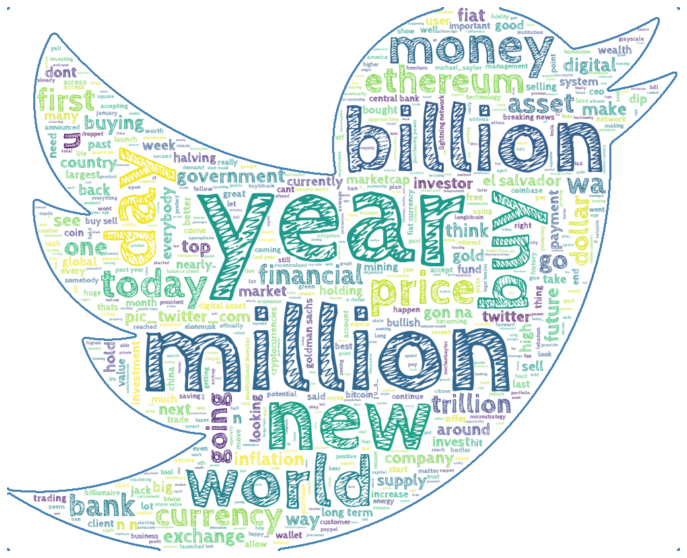

In [296]:
# show
plt.figure(figsize=(20,10))
_ = plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
#NEED TO CLEAN UP SOME OF THESE STOPWORDS >>>
#NEED TO ADD DATA SOURCE 3

In [ ]:
##Sentiment Analysis

In [297]:
# load the vader library for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [298]:
list(final_all_coins_df)

['Unnamed: 0',
 'FULL_TEXT',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_last1days:negative',
 'BTC_target',
 'BTC_close',
 'ADA_target',
 'ADA_close',
 'Lite_target',
 'Lite_close',
 'clean_text1',
 'clean_text2']

In [300]:
# get sentiment score applying the vaderSentiment functions
final_all_coins_df['sentiment1'] = final_all_coins_df['FULL_TEXT'].apply(analyzer.polarity_scores)
final_all_coins_df['sentiment2'] = final_all_coins_df['VEC.CRYPTOCURR.text_last1days:bitcoin'].apply(analyzer.polarity_scores)


In [301]:
final_all_coins_df.to_csv(r'FINAL_cleaned_text_with_sentiment_scores_df.csv')

In [302]:
final_all_coins_df['sentiment_comp1'] = [c['compound'] for c in final_all_coins_df['sentiment1']]
final_all_coins_df['sentiment_pos1'] = [c['pos'] for c in final_all_coins_df['sentiment1']]
final_all_coins_df['sentiment_neg1'] = [c['neg'] for c in final_all_coins_df['sentiment1']]

final_all_coins_df['sentiment_comp2'] = [c['compound'] for c in final_all_coins_df['sentiment2']]
final_all_coins_df['sentiment_pos2'] = [c['pos'] for c in final_all_coins_df['sentiment2']]
final_all_coins_df['sentiment_neg2'] = [c['neg'] for c in final_all_coins_df['sentiment2']]


In [303]:
final_all_coins_df.to_csv(r'FINAL_all_prices_fulltextscore.csv')
list(final_all_coins_df)

['Unnamed: 0',
 'FULL_TEXT',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_last1days:negative',
 'BTC_target',
 'BTC_close',
 'ADA_target',
 'ADA_close',
 'Lite_target',
 'Lite_close',
 'clean_text1',
 'clean_text2',
 'sentiment1',
 'sentiment2',
 'sentiment_comp1',
 'sentiment_pos1',
 'sentiment_neg1',
 'sentiment_comp2',
 'sentiment_pos2',
 'sentiment_neg2']

In [548]:
#BTC CORRELATIONS

#news item
features = ['BTC_target', 'sentiment_pos2', 'sentiment_neg2','sentiment_comp2']
final_all_coins_df[features].corr()['BTC_target']
final_combined = final_all_coins_df[features].corr()['BTC_target']
print(final_combined)

BTC_target         1.000000
sentiment_pos2     0.016963
sentiment_neg2    -0.042968
sentiment_comp2   -0.025787
Name: BTC_target, dtype: float64


In [549]:
#LITE CORRELATIONS

features = ['Lite_target', 'sentiment_pos2', 'sentiment_neg2','sentiment_comp2']
final_all_coins_df[features].corr()['Lite_target']
final_combined = final_all_coins_df[features].corr()['Lite_target']
print(final_combined)

Lite_target        1.000000
sentiment_pos2     0.061269
sentiment_neg2    -0.017165
sentiment_comp2    0.021058
Name: Lite_target, dtype: float64


In [550]:
#ADA CORRELATIONS

features = ['ADA_target', 'sentiment_pos2', 'sentiment_neg2','sentiment_comp2']
final_all_coins_df[features].corr()['ADA_target']
final_combined = final_all_coins_df[features].corr()['ADA_target']
print(final_combined)

ADA_target         1.000000
sentiment_pos2     0.015175
sentiment_neg2    -0.039244
sentiment_comp2    0.035632
Name: ADA_target, dtype: float64


In [ ]:
#GRAPHS!!

In [551]:
# extract the differemt sentiment - pos, neu, neg : DATASET1
pos_df1 = final_all_coins_df[final_all_coins_df['sentiment_comp2'] > 0]
neu_df1 = final_all_coins_df[final_all_coins_df['sentiment_comp2'] == 0]
neg_df1 = final_all_coins_df[final_all_coins_df['sentiment_comp2'] < 0]


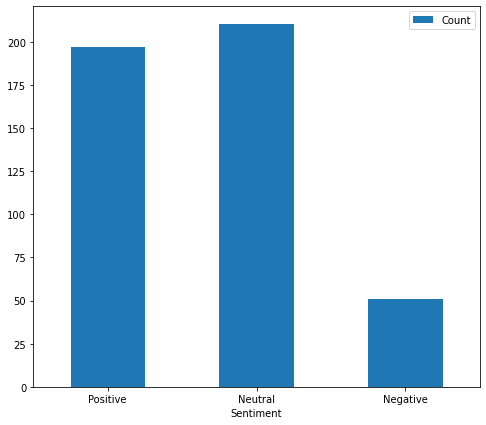

In [552]:
d = {'Sentiment': ['Positive', 'Neutral', 'Negative'], 
     'Count': [len(pos_df1), len(neu_df1),len(neg_df1)]}
pd.DataFrame(d).set_index('Sentiment').plot(kind='bar', figsize=(8, 7), rot=0)
_ = plt.xlabel("Sentiment")

In [ ]:
#ML!!!!!

In [315]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Random Forest Regressor is used to predict the exact vaues of the future returns
#Random Forest Classifier is used only for forecasting future price directions

In [316]:
#BTC
# 1. Data Preparation
data = pd.read_csv('FINAL_all_prices_fulltextscore.csv')
data.tail(1)

,Unnamed: 0,Unnamed: 0.1,FULL_TEXT,VEC.CRYPTOCURR.text_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1,CRYPTOCURR.text_last1days:positive,CRYPTOCURR.text_last1days:negative,BTC_target,BTC_close,...,clean_text1,clean_text2,sentiment1,sentiment2,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2
457,457,9/18/2021,['ray dalio says he thinks governments will ki...,['ray dalio says he thinks governments will ki...,4,4,['between the corruption and fiat debasement g...,[],1,48292.74,...,'ray dalio say think government kill bitcoin b...,'ray dalio say think government kill bitcoin b...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...","{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...",0.4559,0.111,0.079,0.4559,0.111,0.079


In [317]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#BTC ANALYSIS

In [338]:
#part of X data use BTC close price, also try moving average of BTC data
# Define features set
X = data.loc[:,'sentiment_comp1':'sentiment_neg2'].copy().values
    
   # X.drop('BTC_target', axis=1, inplace=True)
X[0]

array([0., 0., 0., 0., 0., 0.])

In [337]:
#data.loc[:,'sentiment_comp1':'sentiment_neg2']

,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2
0,0.0000,0.000,0.000,0.0000,0.000,0.000
1,0.0000,0.000,0.000,0.0000,0.000,0.000
2,-0.8539,0.075,0.342,-0.8539,0.075,0.342
3,0.0000,0.000,0.000,0.0000,0.000,0.000
4,0.3818,0.110,0.000,0.3818,0.110,0.000
...,...,...,...,...,...,...
453,-0.8168,0.034,0.082,-0.8655,0.027,0.108
454,0.8829,0.083,0.009,0.8829,0.083,0.009
455,0.8118,0.130,0.095,-0.2598,0.115,0.112
456,0.9719,0.233,0.000,0.9719,0.233,0.000


In [320]:
# Define target vector
y = data['BTC_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [339]:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [340]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [341]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [342]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [343]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)


In [345]:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())


RandomForestClassifier(n_estimators=5, random_state=78)

In [346]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [348]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

cm_df

,Predicted 0,Predicted 1
Actual 0,17,42
Actual 1,16,40


In [349]:
acc_score

0.4956521739130435

In [372]:
#ADA WORK:
# 1. Data Preparation
ADA_data = pd.read_csv('FINAL_all_prices_fulltextscore.csv')
ADA_data.tail(1)

,Unnamed: 0,Unnamed: 0.1,FULL_TEXT,VEC.CRYPTOCURR.text_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1,CRYPTOCURR.text_last1days:positive,CRYPTOCURR.text_last1days:negative,BTC_target,BTC_close,...,clean_text1,clean_text2,sentiment1,sentiment2,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2
457,457,9/18/2021,['ray dalio says he thinks governments will ki...,['ray dalio says he thinks governments will ki...,4,4,['between the corruption and fiat debasement g...,[],1,48292.74,...,'ray dalio say think government kill bitcoin b...,'ray dalio say think government kill bitcoin b...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...","{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...",0.4559,0.111,0.079,0.4559,0.111,0.079


In [353]:
# Define features set
X = ADA_data.loc[:,'sentiment_comp1':'sentiment_neg2'].copy().values
    
   # X.drop('BTC_target', axis=1, inplace=True)
X[0]

array([0., 0., 0., 0., 0., 0.])

In [371]:
# Define target vector
y = ADA_data['ADA_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [355]:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [356]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [357]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [358]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [359]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [360]:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [364]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [366]:
# Calculating the confusion matrix
ADA_cm = confusion_matrix(y_test, predictions)
ADA_cm_df = pd.DataFrame(
    ADA_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
ADA_acc_score = accuracy_score(y_test, predictions)

ADA_cm_df
ADA_acc_score

0.5130434782608696

In [374]:
#LITE WORK:
# 1. Data Preparation
LITE_data = pd.read_csv('FINAL_all_prices_fulltextscore.csv')
LITE_data.tail(1)

,Unnamed: 0,Unnamed: 0.1,FULL_TEXT,VEC.CRYPTOCURR.text_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1,CRYPTOCURR.text_last1days:positive,CRYPTOCURR.text_last1days:negative,BTC_target,BTC_close,...,clean_text1,clean_text2,sentiment1,sentiment2,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2
457,457,9/18/2021,['ray dalio says he thinks governments will ki...,['ray dalio says he thinks governments will ki...,4,4,['between the corruption and fiat debasement g...,[],1,48292.74,...,'ray dalio say think government kill bitcoin b...,'ray dalio say think government kill bitcoin b...,"{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...","{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'com...",0.4559,0.111,0.079,0.4559,0.111,0.079


In [376]:
# Define features set
X = LITE_data.loc[:,'sentiment_comp1':'sentiment_neg2'].copy().values

X[0]

array([0., 0., 0., 0., 0., 0.])

In [377]:
# Define target vector
y = LITE_data['Lite_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [378]:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [379]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [380]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [381]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [382]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [383]:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [384]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [385]:
# Calculating the confusion matrix
LITE_cm = confusion_matrix(y_test, predictions)
LITE_cm_df = pd.DataFrame(
    LITE_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
LITE_acc_score = accuracy_score(y_test, predictions)

LITE_cm_df
LITE_acc_score

0.6260869565217392

In [ ]:
## LOOKS LIKE THE PREDICTOR WORKS BEST FOR LITE COIN

In [ ]:
## TOOLING AROUND WITH THE INPUTS TO MAKE THE MODEL BETTER FOR BTC:

In [419]:
#BTC
list(data)
#data_btc_df = data.drop(columns= ['sentiment2'], inplace=True, axis=1)
data.to_csv(r'final_Data_for_ML.csv')

In [409]:
#part of X data use BTC close price, also try moving average of BTC data
# Define features set
#STEP1:
X = data.loc[:,'BTC_close':'sentiment_neg2'].copy().values
    
   # X.drop('BTC_target', axis=1, inplace=True)
X[0]

array([7.20085e+03, 1.00000e+00, 3.34600e-02, 1.00000e+00, 4.16200e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

In [410]:
# STEP 2: 
#Define target vector
y = data['BTC_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [411]:
#STEP 3:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [412]:
#STEP 4:
# Create the StandardScaler instance
scaler = StandardScaler()

In [413]:
#STEP 5:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [414]:
#STEP 6:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [415]:
#STEP 7: 
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [416]:
#STEP 8:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [417]:
#STEP 9:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [418]:
#STEP 10:
# Calculating the confusion matrix
BTC_2_cm = confusion_matrix(y_test, predictions)
BTC_2_cm_df = pd.DataFrame(
    BTC_2_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
BTC_2_acc_score = accuracy_score(y_test, predictions)

BTC_2_cm_df
BTC_2_acc_score

0.7739130434782608

In [ ]:
#NOTES - CREATE A CORRELATION MATRIX FOR THE COINS AGAINST EACH OTHER.
# RUN THE OTHER COINS THROUGH THE NEW ML


In [420]:
#ML - ADA
list(data)

['Unnamed: 0',
 'Unnamed: 0.1',
 'FULL_TEXT',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_last1days:negative',
 'BTC_target',
 'BTC_close',
 'ADA_target',
 'ADA_close',
 'Lite_target',
 'Lite_close',
 'sentiment_comp1',
 'sentiment_pos1',
 'sentiment_neg1',
 'sentiment_comp2',
 'sentiment_pos2',
 'sentiment_neg2']

In [427]:
#Drop the target column for the x table:
data.drop(columns= ['ADA_target'], inplace=True, axis=1)

In [428]:
#STEP1:
# Define features set
X = data.loc[:,'BTC_target':'sentiment_neg2'].copy().values

X[0]

array([1.00000e+00, 7.20085e+03, 3.34600e-02, 1.00000e+00, 4.16200e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

In [432]:
 
#READ in the file for the X target
file_path = Path('final_Data_for_ML.csv')
ADA_data = pd.read_csv(file_path)


In [433]:
# STEP 2:
#Define target vector
y = ADA_data['ADA_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [434]:
#STEP 3:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [435]:
#STEP 4:
# Create the StandardScaler instance
scaler = StandardScaler()

In [436]:
#STEP 5:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [437]:
#STEP 6:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [438]:
#STEP 7: 
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [439]:
#STEP 8:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [440]:
#STEP 9:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [444]:
#STEP 10:
# Calculating the confusion matrix
ADA_2_cm = confusion_matrix(y_test, predictions)
ADA_2_cm_df = pd.DataFrame(
    ADA_2_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
ADA_2_acc_score = accuracy_score(y_test, predictions)

ADA_2_cm_df
ADA_2_acc_score

0.7304347826086957

In [451]:
## LITE COIN ML WITH ALL DATA:

#READ in the file for the X target
file_path = Path('final_Data_for_ML.csv')
Lite_data_X = pd.read_csv(file_path)


In [452]:
#Drop the target column for the x table:
Lite_data_X.drop(columns= ['Lite_target'], inplace=True, axis=1)

In [453]:
#STEP1:
# Define features set
X = Lite_data_X.loc[:,'BTC_target':'sentiment_neg2'].copy().values

X[0]

array([1.00000e+00, 7.20085e+03, 1.00000e+00, 3.34600e-02, 4.16200e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

In [454]:
#read in data again to use the lite_target column for the y
#READ in the file for the X target
file_path = Path('final_Data_for_ML.csv')
Lite_data_y = pd.read_csv(file_path)


In [456]:
# STEP 2:
#Define target vector
y = Lite_data_y['Lite_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [457]:
#STEP 3:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [458]:
#STEP 4:
# Create the StandardScaler instance
scaler = StandardScaler()

In [459]:
#STEP 5:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [460]:
#STEP 6:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [461]:
#STEP 7: 
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [462]:
#STEP 8:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [463]:
#STEP 9:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [464]:
#STEP 10:
# Calculating the confusion matrix
Lite_2_cm = confusion_matrix(y_test, predictions)
Lite_2_cm_df = pd.DataFrame(
    Lite_2_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
Lite_2_acc_score = accuracy_score(y_test, predictions)

Lite_2_cm_df
Lite_2_acc_score

0.8

In [518]:
#LOOK AT THE CORRELATION BETWEEN THE COINS

file_path = Path('final_Data_for_ML.csv')
data_correlation = pd.read_csv(file_path)

list(data_correlation)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'FULL_TEXT',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_last1days:negative',
 'BTC_target',
 'BTC_close',
 'ADA_target',
 'ADA_close',
 'Lite_target',
 'Lite_close',
 'sentiment_comp1',
 'sentiment_pos1',
 'sentiment_neg1',
 'sentiment_comp2',
 'sentiment_pos2',
 'sentiment_neg2']

In [519]:
features = ['BTC_target', 'ADA_target', 'Lite_target']
data_correlation[features].corr()['BTC_target']
df_correlation_coins = data_correlation[features].corr()['BTC_target']
print(df_correlation_coins)


BTC_target     1.000000
ADA_target     0.600554
Lite_target    0.703663
Name: BTC_target, dtype: float64


<AxesSubplot:>

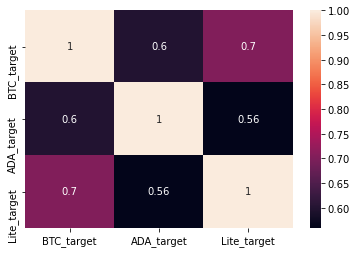

In [520]:
corr_matrix = data_correlation[features].corr()
sns.heatmap(corr_matrix, annot = True)

In [521]:
features = ['ADA_target', 'BTC_target', 'Lite_target']
data_correlation[features].corr()['ADA_target']
df_correlation_coins = data_correlation[features].corr()['ADA_target']
print(df_correlation_coins)

ADA_target     1.000000
BTC_target     0.600554
Lite_target    0.559284
Name: ADA_target, dtype: float64


<AxesSubplot:>

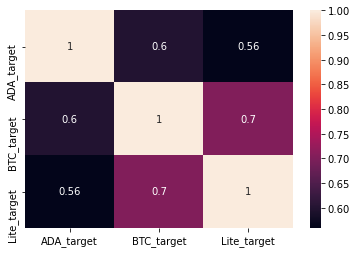

In [522]:
corr_matrix = data_correlation[features].corr()
sns.heatmap(corr_matrix, annot = True)

In [523]:
features = ['Lite_target', 'BTC_target', 'ADA_target']
data_correlation[features].corr()['Lite_target']
df_correlation_coins = data_correlation[features].corr()['Lite_target']
print(df_correlation_coins)

Lite_target    1.000000
BTC_target     0.703663
ADA_target     0.559284
Name: Lite_target, dtype: float64


<AxesSubplot:>

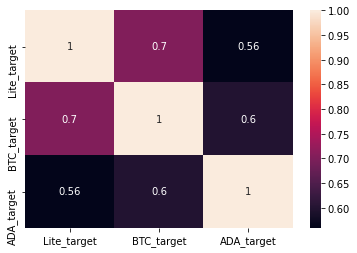

In [524]:

corr_matrix = data_correlation[features].corr()
sns.heatmap(corr_matrix, annot = True)
#CHANGE THE COLORS>>

In [ ]:
#Conclusion: BTC is more closely correlated to Lite Coin than ADA

In [ ]:
## ADDITIONAL STUFF - LETS SEE IF IT WORKS

In [529]:
file_path = Path('Combined_ALL_coins_df2.csv')
Combined_cryptos_df = pd.read_csv(file_path)
list(Combined_cryptos_df)

['Unnamed: 0',
 'Unnamed: 0.1',
 'date',
 'close',
 'target',
 'VEC.timestamp',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'BTC_target',
 'BTC_close',
 'Unnamed: 0.2',
 'date.1',
 'price',
 'target.1',
 'VEC.CRYPTOCURR.text_last1days:crypto',
 'VEC.timestamp.1',
 'VEC.CRYPTOCURR.text_COUNT_last1days:crypto',
 'ADA_target',
 'ADA_close',
 'Unnamed: 0.3',
 'date.2',
 'close.1',
 'target.2',
 'CRYPTOCURR.text_COUNT_last1days:positive',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_COUNT_last1days:negative',
 'CRYPTOCURR.text_last1days:negative',
 'VEC.timestamp.2',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'VEC.CRYPTOCURR.text_last1days:bitcoin.1',
 'Lite_target',
 'Lite_close']

In [544]:
#Combined_cryptos_df['BTC_log_return'] = np.log(Combined_cryptos_df['BTC_close']/ Combined_cryptos_df['BTC_close'].shift(1))
#Combined_cryptos_df['ADA_log_return'] = np.log(Combined_cryptos_df['ADA_close']/ Combined_cryptos_df['ADA_close'].shift(1))
Combined_cryptos_df['Lite_log_return'] = np.log(Combined_cryptos_df['Lite_close']/ Combined_cryptos_df['Lite_close'].shift(1))

<AxesSubplot:title={'center':' BTC - ADA - LITE log return'}>

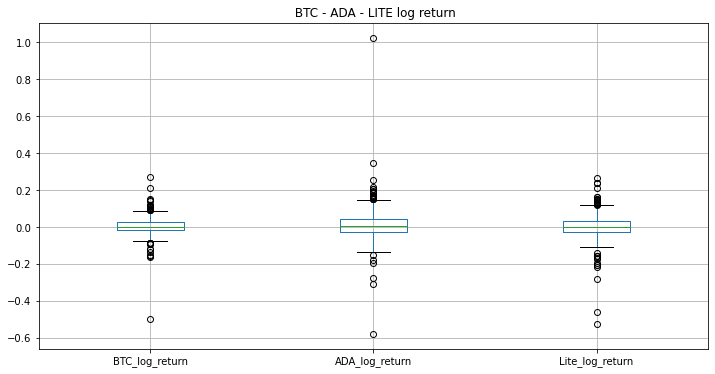

In [555]:
#PERFORMANCE SPECTRUM: OF BTC

fig, ax = plt.subplots(figsize= (12,6))
ax.set_title(' BTC - ADA - LITE log return')
Combined_cryptos_df.boxplot(column=['BTC_log_return','ADA_log_return','Lite_log_return'])

In [ ]:
DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)

In [ ]:
# WHAT IF WE RAN BTC ML with only PRICING DATA NO SENTIMENT SCORES?

In [557]:
#READ in the file for the X target
file_path = Path('final_Data_for_ML.csv')
BTC_data_3 = pd.read_csv(file_path)


In [558]:
#Drop the target column for the x table:
BTC_data_3.drop(columns= ['BTC_target'], inplace=True, axis=1)

In [559]:
list(BTC_data_3)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'FULL_TEXT',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin.1',
 'CRYPTOCURR.text_last1days:positive',
 'CRYPTOCURR.text_last1days:negative',
 'BTC_close',
 'ADA_target',
 'ADA_close',
 'Lite_target',
 'Lite_close',
 'sentiment_comp1',
 'sentiment_pos1',
 'sentiment_neg1',
 'sentiment_comp2',
 'sentiment_pos2',
 'sentiment_neg2']

In [560]:
#STEP1:
# Define features set
X = BTC_data_3.loc[:,'BTC_close':'Lite_close',].copy().values

X[0]

array([7.20085e+03, 1.00000e+00, 3.34600e-02, 1.00000e+00, 4.16200e+01])

In [561]:
#read in data again to use the lite_target column for the y
#READ in the file for the X target
file_path = Path('final_Data_for_ML.csv')
BTC_data_3y = pd.read_csv(file_path)

In [562]:
# STEP 2:
#Define target vector
y = BTC_data_3y['BTC_target'].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [563]:
#STEP 3:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [564]:
#STEP 4:
# Create the StandardScaler instance
scaler = StandardScaler()

In [565]:
#STEP 5:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [566]:
#STEP 6:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [567]:
#STEP 7: 
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=5, random_state=78)

In [568]:
#STEP 8:
# Fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=78)

In [569]:
#STEP 9:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [571]:
#STEP 10:
# Calculating the confusion matrix
BTC_3_cm = confusion_matrix(y_test, predictions)
BTC_3_cm_df = pd.DataFrame(
    BTC_3_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
BTC_3_acc_score = accuracy_score(y_test, predictions)

BTC_3_cm_df
BTC_3_acc_score

0.7913043478260869